# Tutorial: Deep learning on MNIST

This tutorial demonstrates how to build and train a simple 3-layer [feed-forward neural network](https://en.wikipedia.org/wiki/Feedforward_neural_network) with [backpropagation](https://en.wikipedia.org/wiki/Backpropagation) learning from scratch.

The deep learning model that you will construct with NumPy will learn from the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, which contains 60,000 training and 10,000 test images and corresponding labels of handwritten digits from 0 to 9. In this tutorial you will learn how to parse and load the dataset without the aid of external deep learning libraries. Each training and test image is of size 784 (or 28x28 pixels) — this will be your input for the neural network. The images have corresponding labels of digits from 0 to 9 (10 in total).

Based on the image inputs and their labels, your neural network will be trained to learn their features using forward propagation and backpropagation (reverse-mode differentiation). The final output of the network is a vector of 10 scores — one for each handwritten digit image. You will also evaluate how good your model is at classifying the images on the test set. This type of machine or deep learning is often referred to as [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning).

This tutorial was adapted from the work by [Andrew Trask](https://github.com/iamtrask/) (with the author's permission) and inspired by the teachings of [Joel Grus](https://github.com/joelgrus).

### Prerequisites

The reader should have some knowledge of Python, NumPy array manipulation, and linear algebra. In addition, you should be familiar with main concepts of [deep learning](https://en.wikipedia.org/wiki/Deep_learning). 

To refresh the memory, you can take the [Python](https://docs.python.org/dev/tutorial/index.html) and [Linear algebra on n-dimensional arrays](https://numpy.org/doc/stable/user/tutorial-svd.html) tutorials. 

You are advised to read the [Deep learning](http://www.cs.toronto.edu/~hinton/absps/NatureDeepReview.pdf) paper published in 2015 by Yann LeCun, Yoshua Bengio, and Geoffrey Hinton, who are regarded as some of the pioneers of the field.

In addition to NumPy, you will be utilizing the following Python standard modules for data loading and processing: 
- [`urllib`](https://docs.python.org/3/library/urllib.html) for URL handling.
- [`request`](https://docs.python.org/3/library/urllib.request.html) for URL opening.
- [`gzip`](https://docs.python.org/3/library/gzip.html) for gzip file decompression.
- [`pickle`](https://docs.python.org/3/library/pickle.html) to work with the pickle file format.

    as well as:
- [matplotlib](https://matplotlib.org/) for data visualization.

This tutorial can be run locally in an isolated environment, such as [Virtualenv](https://virtualenv.pypa.io/en/stable/). You can use [Jupyter Notebook or JupyterLab](https://jupyter.org/install) to run each notebook cell. Don't forget to [set up NumPy](https://numpy.org/doc/stable/user/absolute_beginners.html#installing-numpy) and [matplotlib](https://matplotlib.org/users/installing.html#installing-an-official-release).

### Table of contents

1. Load the MNIST dataset

2. Preprocess the dataset

3. Build and train a small neural network from scratch

4. Next steps

---

## 1. Load the MNIST dataset

In this section, you will download the MNIST dataset and transform it into 4 files of NumPy arrays using built-in Python modules. Then, you will split the arrays into training and test sets.

(Credit to [hsjeong5](https://github.com/hsjeong5/MNIST-for-Numpy) for demonstrating how to carry out these steps without the use of external libraries.)

1. Download and prepare the data:

First, we download and store the zipped files, originally stored in [Yann LeCun's website](http://yann.lecun.com/exdb/mnist/). For this, we'll define a variable to store the training/test image/label names of the MNIST dataset in a list:

In [1]:
filename = [["training_images", "train-images-idx3-ubyte.gz"],   # 60,000 training images.
            ["test_images", "t10k-images-idx3-ubyte.gz"],        # 10,000 test images.
            ["training_labels", "train-labels-idx1-ubyte.gz"],   # 60,000 training labels.
            ["test_labels", "t10k-labels-idx1-ubyte.gz"]]        # 10,000 test labels.

Now, we'll download each of the four files in the list.

In [2]:
from urllib import request
base_url = "http://yann.lecun.com/exdb/mnist/"
for name in filename:
    print("Downloading file: " + name[1])
    request.urlretrieve(base_url + name[1], name[1])

Next, we extract and save the data to disk, using NumPy for the first time to read the contents of each file as [ndarrays](https://numpy.org/doc/stable/reference/arrays.ndarray.html) and saving them into a dictionary.

In [38]:
import gzip
import numpy as np

mnist_dataset = {}
for name in filename[:2]:
    with gzip.open(name[1], 'rb') as mnist_file:
        mnist_dataset[name[0]] = np.frombuffer(mnist_file.read(), np.uint8, offset=16).reshape(-1, 28*28)
for name in filename[-2:]:
    with gzip.open(name[1], 'rb') as mnist_file:
        mnist_dataset[name[0]] = np.frombuffer(mnist_file.read(), np.uint8, offset=8)

2. Split the images and labels into training and test sets.

For this, we'll use the standard notation and call the training and test set of images as `x_train` and `x_test`, and the set of labels as `y_train` and `y_test`. 

In [39]:
x_train, y_train, x_test, y_test = (mnist_dataset["training_images"],
                                    mnist_dataset["training_labels"],
                                    mnist_dataset["test_images"],
                                    mnist_dataset["test_labels"])

To make sure we have the right data, we can print the shape of the sets we just built.

In [18]:
print('The shape of training images: {} and training labels: {}'.format(x_train.shape, y_train.shape))
print('The shape of test images: {} and test labels: {}'.format(x_test.shape, y_test.shape))

The shape of training images: (60000, 784) and training labels: (60000,)
The shape of test images: (10000, 784) and test labels: (10000,)


3. (Optional) You can inspect some samples of the image data with matplotlib and image labels:

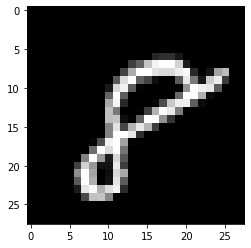

In [19]:
import matplotlib.pyplot as plt

# Take the 60,000th image (index 59999) from the training set, reshape to (28x28) if necessary.
mnist_image = x_train[59999, :].reshape(28, 28)
# Set the color mapping to grayscale.
plt.imshow(mnist_image, cmap='gray')
# Display the image.
plt.show()

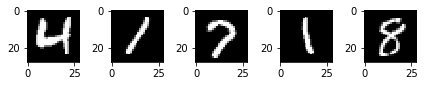

In [20]:
# Display 5 random images from the training set.
np.random.seed(0)
indices = list(np.random.randint(x_train.shape[0], size=9))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[indices[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.tight_layout()

> **Note:** You can also visualize a sample image as an array by printing `x_train[59999]`. Here, `59999` is your 60,000th training image sample (`0` would be your first). Your output will be quite long and should contain an array of 8-bit integers:
>
> 
> ```
> ...
>          0,   0,  38,  48,  48,  22,   0,   0,   0,   0,   0,   0,   0,
>          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
>          0,  62,  97, 198, 243, 254, 254, 212,  27,   0,   0,   0,   0,
> ...
> ```

In [21]:
# Display the label of the 60,000th image (index 59999) from the training set.
y_train[59999]

8

## 2. Preprocess the data

You have loaded the MNIST dataset and saved it to disk as 4 files:

- `training_images`: flattened training images of size 60,000x784.
- `training_labels`: labels corresponding to the training images of size 1x60,000.
- `test_images`: flattened test images of size 60,000x784.
- `test_labels`: labels corresponding to the training images of size 1x60,000.

Neural networks can work with inputs that are in a form of tensors (multidimensional arrays) of floating-point type. Since the MNIST data arrays are of `dtype` `uint8`, your next challenge is to convert them to floating points, such as `float64`.

> **Note:** Data preparation in deep learning is a very challenging process that can take a lot of time, especially if the data is in a more raw form. When preprocessing the data, you should consider the following processes:
> 
> - [_Vectorization_](https://en.wikipedia.org/wiki/Vectorization_%28mathematics%29): The data should be vectorized and, luckily, the MNIST dataset already is.
> 
> - [_Conversion to floating points_](https://en.wikipedia.org/wiki/Floating-point_arithmetic#Floating-point_numbers)_: Neural networks can work with data that is of floating-point type.
> 
>    In practice, you can use different types of floating-point precision depending on your goals and you can find more information about that in the [Nvidia](https://blogs.nvidia.com/blog/2019/11/15/whats-the-difference-between-single-double-multi-and-mixed-precision-computing/) and [Google Cloud](https://cloud.google.com/blog/products/ai-machine-learning/bfloat16-the-secret-to-high-performance-on-cloud-tpus) blog posts.

Since your dataset is already represented by arrays containing 8-bit integers, let's convert their `dtype` to floating points, such as `float64` — 64-bit (or [double-precision](https://en.wikipedia.org/wiki/Double-precision_floating-point_format)) — by doing the following:

- _Normalizing_ the image data. 

- _[One-hot/categorical encoding](https://en.wikipedia.org/wiki/One-hot)_ of the image labels.

### Convert the image data to floating points

The images data contain 8-bit integers encoded in the [0, 255] interval with color values between 0 and 255. 

You will normalize them into floating-point arrays in the [0, 1] interval by dividing them by 255.

> **Note:** Since the numbers inside matrices will be smaller, it should also make it faster for the neural network to learn from that data.


1. (Optional) Check that the vectorized image data has type `uint8`:


In [22]:
print('The data type of training images: {}'.format(x_train.dtype))
print('The data type of test images: {}'.format(x_test.dtype))

The data type of training images: uint8
The data type of test images: uint8


2. Normalize by dividing the arrays by 255 and assign the train and test image data variables — `x_train` and `x_test` — to `training_images` and `train_labels`, respectively:

In [23]:
# Transform the arrays in the [0, 1] interval by dividing them by 255.
sample = 1000
training_images = x_train[0:sample].reshape(sample, 28*28) / 255
test_images = x_test.reshape(len(x_test), 28*28) / 255

> **Note:** To make the neural network model train faster in this example, `training_images` contains only 1,000 samples out of 60,000. To learn from the entire sample size, change the `sample` variable to `60000`.


3. Confirm that the image data has changed to the floating-point format:

In [24]:
print('The data type of training images: {}'.format(training_images.dtype))
print('The data type of test images: {}'.format(test_images.dtype))

The data type of training images: float64
The data type of test images: float64


> **Note:** You can also check that normalization was successful by printing `training_images[0]` in a notebook cell. Your long output should contain an array of floating point numbers:
> 
> ```
> ...
>        0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
       0.07058824, 0.49411765, 0.53333333, 0.68627451, 0.10196078,
       0.65098039, 1.        , 0.96862745, 0.49803922, 0.        ,
> ...
> ```

### Convert the labels to floating points through categorical/one-hot encoding

You will use one-hot encoding to embed each digit label as an all-zero vector with `np.zeros()` and place `1` for a label index. As a result, your label data will be arrays with `1.0` (or `1.`) in the position of each image label.

Since there are 10 labels (from 0 to 9) in total, your arrays will look similar to this: 

```
array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])
```

1. (Optional) Confirm that the image label data are integers with `dtype` `uint8`:


In [25]:
print('The data type of training labels: {}'.format(y_train.dtype))
print('The data type of test labels: {}'.format(y_test.dtype))

The data type of training labels: uint8
The data type of test labels: uint8


2. Define a function that performs one-hot encoding on arrays:

In [26]:
def one_hot_encoding(labels, dimension=10):
    """One-hot encode arrays."""
    # Define a one-hot variable for an all-zero vector 
    # with 10 dimensions (number labels from 0 to 9).
    one_hot_labels = np.zeros((len(labels), dimension))
    # Embed each label as an all-zero vector and...
    for i, label in enumerate(labels):
        # ... place `1` for a label index.
        one_hot_labels[i][label] = 1 
    # Return one-hot encoded labels.
    return one_hot_labels

3. Use the newly created function to one-hot encode the image labels and assign the train and test label data variables — `y_train` and `y_test` — to `training_labels` and `test_labels`, respectively:


In [27]:
training_labels = one_hot_encoding(y_train)
test_labels = one_hot_encoding(y_test)

4. Check that the data type has changed to floating point:

In [28]:
print('The data type of training labels: {}'.format(training_labels.dtype))
print('The data type of test labels: {}'.format(test_labels.dtype))

The data type of training labels: float64
The data type of test labels: float64


5. (Optional) Visualize a few samples of the one-hot encoded labels:

In [29]:
print(training_labels[0])
print(training_labels[1])
print(training_labels[2])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


and compare them to the original labels:

In [30]:
print(y_train[0])
print(y_train[1])
print(y_train[2])

5
0
4


You have finished preparing the dataset.

## 3. Build and train a small neural network from scratch

In this section you will familiarize with some high-level concepts of the basic building blocks of a deep learning model. You can refer to the original [Deep learning](http://www.cs.toronto.edu/~hinton/absps/NatureDeepReview.pdf) research publication for more information.

Afterwards, you will construct the building blocks of a simple deep learning model in Python and NumPy and train it to learn to identify handwritten digits from the MNIST dataset with a certain level of accuracy.

### Neural network building blocks with NumPy

- _Layers_: These building blocks work as data filters — they process data and learn representations from inputs to better predict the target outputs.

    You will use 3 layers in your model to pass the inputs forward (_forward propagation_) and propagate the gradients/error derivatives of a loss function backward (_backpropagation_). These are input, hidden and output layers.
    
    In the hidden (middle) and output (last) layers, the neural network model will compute the weighted sum of inputs. To compute this process, you will use NumPy's matrix multiplication module (the "dot multiply" or `np.dot(layer, weights)`).

    > **Note:** For simplicity, the bias term is omitted in this example (there is no `np.dot(layer, weights) + bias`).

- _Weights_: These are important adjustable parameters that the neural network fine-tunes by forward and backward propagating the data. 
    
    The optimal weights should produce the highest prediction accuracy and the lowest error on the training and test sets. Before the model training starts, the weights are randomly initialized with NumPy's `np.random.random()` module.

- _Activation function_: Deep learning models are capable of determining non-linear relationships between inputs and inputs and these [non-linear functions](https://en.wikipedia.org/wiki/Activation_function) are usually applied to the output of each layer.

    You will use a [rectified linear unit (ReLU)](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) to the hidden layer's output (for example, `relu(np.dot(layer, weights))`.

- _Regularization_: This [technique](https://en.wikipedia.org/wiki/Regularization_(mathematics) helps prevent the neural network model from [overfitting](https://en.wikipedia.org/wiki/Overfitting). 

    In this example, you will use a method called dropout ([dilution](https://en.wikipedia.org/wiki/Dilution_(neural_networks))) that randomly sets a number of features in a layer to 0s. You will define it with NumPy's `np.random.randint()` module and apply it to the hidden layer of the network.

- _Loss function_: The computation determines the quality of predictions by comparing the image labels (the truth) with the predicted values in the final layer's output.

    For simplicity, you will use a basic total-squared error using NumPy's `np.sum()` function (for example, `np.sum((final_layer_output - image_labels) ** 2)`).

- _Accuracy_: This metric measures the accuracy of the network's ability to predict on the data it hasn't seen.

- _Forward propagation, backpropagation, training loop_: 

    In the beginning of model training, your network randomly initializes the weights and feeds the input data forward from the first to last layers. This process is the forward pass or forward propagation. 
    
    Then, the network propagates the "signal" from the loss function back through the hidden layer and adjusts the weights values with the help of the alpha parameter (more on that later). 
    
> **Note:** In more technical terms, you: 
>    
>    1. Measure the error by comparing the real label of an image (the truth) with the prediction of the model.
>    2. Differentiate the loss function.
>    3. Ingest the [gradients](https://en.wikipedia.org/wiki/Gradient) with the respect to the output, and backpropagate them with the respect to the inputs through the layer(s). 
>    
>    Since the network contains tensor operations and weight matrices, backpropagation uses the [chain rule](https://en.wikipedia.org/wiki/Chain_rule).
>
>    With each iteration (epoch) of the neural network training, this forward and backward propagation cycle adjusts the weights, which is reflected in the accuracy and error metrics. As you train the model, your goal is to minimize the error and maximize the accuracy on the training data, where the model learns from, as well as the test data, where you evaluate the model.

### Model architecture summary

Here is a simplified illustration of the neural network model architecture:

```
    Input data

        -> Input layer
        -> Hidden layer
        -> ReLU
        -> Dropout
        -> Output layer

    -> Outputs with predictions

```

- _The input layer_: 

    The first layer of the network represents the previously preprocessed data that is loaded from `training_images` into `layer_0`.

- _The hidden (middle) layer_: 

    `layer_1` takes the output from the previous layer and performs matrix-multiplication of the inputs by weights (`weights_1`) with NumPy's `np.dot()`).

    Then, this output is passed through the ReLU activation function for non-linearity and then dropout is applied to help with overfitting.

- _The output (last) layer_: 

    `layer_2` ingests the output from `layer_1` and repeats the same "dot multiply" process with `weights_2`.

    The final output returns 10 scores for each of the 0-9 digit labels. The network model ends with a size 10 layer — a 10-dimensional vector.

### Compose the model and begin training and testing it

Having covered the main deep learning concepts and the neural network architecture, let's write the code.

1. For reproducibility, initialize a random seed with `np.random.seed()`:

In [31]:
np.random.seed(1)

2. For the hidden layer, define the ReLU activation function for forward propagation and ReLU's derivative that will be used during backpropagation:

In [32]:
# Define ReLU that returns the input if it's positive and 0 otherwise.
def relu (x):
    return (x>=0) * x

# Set up a derivative of the ReLU function that returns 1 for a positive input 
# and 0 otherwise.

def relu2deriv(output):
    return output >= 0

3. Set certain default values of [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)), such as:

- _Alpha_: `alpha` — helps prevent the weights from overcorrecting during the updates.
- _Epochs (iterations)_: `epochs` — the number of complete passes — forward and backward propagations — of the data through the network. This parameter can positively or negatively affect the results. The higher the iterations, the longer the learning process may take.
- _Size of the hidden (middle) layer in a network_: `hidden_size` — different sizes of the hidden layer can affect the results during training and testing.
- _Size of the input:_ `pixels_per_image` — you have established that the image input is 784 (28x28) (in pixels).
- _Number of labels_: `num_labels` — indicates the output number for the output layer where the predictions occur for 10 (0 to 9) handwritten digit labels.

In [33]:
alpha = 0.005
epochs = 100
hidden_size = 100
pixels_per_image = 784
num_labels = 10

5. Initialize the weight vectors that will used for each the middle and output layers with NumPy's `random.random()`:

In [34]:
weights_1 = 0.2 * np.random.random((pixels_per_image, hidden_size)) - 0.1
weights_2 = 0.2 * np.random.random((hidden_size, num_labels)) - 0.1

6. Set up the neural network's learning experiment with a training loop and start the training process:

In [36]:
# This is a training loop.
# Run the learning experiment for a defined number of epochs (iterations).
for j in range(epochs):
    # Set the initial loss/error and the number of accurate predictions to zero.
    training_loss = 0.0
    training_accurate_predictions = 0
    
    # For all images in the training set, perform a forward pass
    # and backpropagation and adjust the weights accordingly.
    for i in range(len(training_images)):
        # Forward propagation/forward pass:
        # 1. The input layer:
        #    Initialize the training image data as the first layer.
        layer_0 = training_images[i:i+1]
        # 2. The hidden layer:
        #    Take in the training image data into the middle layer by 
        #    matrix-multiplying it by randomly initialized weights. 
        layer_1 = np.dot(layer_0, weights_1)
        # 3. Pass the hidden layer's output through the ReLU activation function.
        layer_1 = relu(layer_1)
        # 4. Define the dropout function for regularization.
        dropout_mask = np.random.randint(0, high=2, size=layer_1.shape)
        # 5. Apply dropout to the hidden layer's output.
        layer_1 *= dropout_mask * 2
        # 6. The output layer:
        #    Ingest the output of the middle layer into the the final layer
        #    by matrix-multiplying it by randomly initialized weights.
        #    Produce a 10-dimension vector with 10 scores.
        layer_2 = np.dot(layer_1, weights_2)

        # Backpropagation/backward pass:
        # 1. Measure the training error (loss function) between the actual
        #    image labels (the truth) and the prediction by the model.
        training_loss += np.sum((training_labels[i:i+1] - layer_2) ** 2)
        # 2. Increment the correct accuracy predictions.
        training_accurate_predictions += int(np.argmax(layer_2) == np.argmax(training_labels[i:i+1]))
        # 3. Differentiate the loss function/error.
        layer_2_delta = (training_labels[i:i+1] - layer_2)
        # 3. Propagate the gradients of the loss function back through the hidden layer.
        layer_1_delta = layer_2_delta.dot(weights_2.T) * relu2deriv(layer_1)
        # 5. Apply the dropout to the gradients.
        layer_1_delta *= dropout_mask
        # 6. Update the weights for the middle and input layers
        #    by multiplying them by alpha and the gradients.
        weights_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_1 += alpha * layer_0.T.dot(layer_1_delta)

    # For every 10 epochs:
    if(j % 10 == 0):
        # 1. Set the initial error and the number of accurate predictions to zero.
        test_loss = 0.0
        test_accurate_predictions = 0
        
        # 2. Start testing the model by evaluating on the test image dataset.
        for i in range(len(test_images)):
            # 1. Pass the test images through the input layer.
            layer_0 = test_images[i:i+1]
            # 2. Compute the weighted sum of the test image inputs in and
            #    pass the hidden layer's output through ReLU.
            layer_1 = relu(np.dot(layer_0,weights_1))
            # 3. Compute the weighted sum of the hidden layer's inputs.
            #    Produce a 10-dimension vector with 10 scores.
            layer_2 = np.dot(layer_1, weights_2)

            # 4. Measure the error between the actual label (truth) and prediction values.
            test_loss += np.sum((test_labels[i:i+1] - layer_2) ** 2)
            # 5. Increment the accurate prediction count.
            test_accurate_predictions += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))

        # 3. Display the error and accuracy metrics in the output.
        print("\n" + \
              "Epoch:" + str(j+10) + \
              " Training set error:" + str(training_loss/ float(len(training_images)))[0:5] +\
              " Training set accuracy:" + str(training_accurate_predictions/ float(len(training_images))) +\
              " Test set error:" + str(test_loss/ float(len(test_images)))[0:5] +\
              " Test set accuracy:" + str(test_accurate_predictions/ float(len(test_images))))


Epoch:10 Training set error:0.650 Training set accuracy:0.62 Test set error:0.578 Test set accuracy:0.6835

Epoch:20 Training set error:0.460 Training set accuracy:0.779 Test set error:0.439 Test set accuracy:0.7984

Epoch:30 Training set error:0.436 Training set accuracy:0.801 Test set error:0.435 Test set accuracy:0.8042

Epoch:40 Training set error:0.424 Training set accuracy:0.813 Test set error:0.428 Test set accuracy:0.8043

Epoch:50 Training set error:0.410 Training set accuracy:0.85 Test set error:0.420 Test set accuracy:0.8102

Epoch:60 Training set error:0.398 Training set accuracy:0.838 Test set error:0.412 Test set accuracy:0.8121

Epoch:70 Training set error:0.390 Training set accuracy:0.848 Test set error:0.414 Test set accuracy:0.823

Epoch:80 Training set error:0.380 Training set accuracy:0.844 Test set error:0.411 Test set accuracy:0.8115

Epoch:90 Training set error:0.378 Training set accuracy:0.863 Test set error:0.410 Test set accuracy:0.8109

Epoch:100 Training se

The training process may take many minutes, depending on a number of factors, such as the processing power of the machine you are running the experiment on and the number of epochs. To reduce the waiting time, you can change the epoch (iteration) variable from 100 to a lower number, reset the runtime, and run the notebook cells again.

## Next steps

You have learned how to build and train a simple 3-layer feed-forward neural network from scratch using just NumPy to classify handwritten MNIST digits.

The accuracy rates that your model reaches during training may be somewhat plausible but you may also find the error rate to be high. 

To enhance and optimize your small neural network model, you can consider one of a mixture of the following:
- Increase the training sample size from 1,000 to a higher number (up to 60,000).
- Alter the architecture by introducing more hidden layers to make the network [deeper](https://en.wikipedia.org/wiki/Deep_learning).
- Introduce convolutional layers and replace the feedforward network with a [convolutional neural network](https://en.wikipedia.org/wiki/Convolutional_neural_network) architecture.
- Use a higher epoch size to train longer and add more regularization techniques, such as [early stopping](https://en.wikipedia.org/wiki/Early_stopping), to prevent [overfitting](https://en.wikipedia.org/wiki/Overfitting).
- Introduce a [validation set](https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets) for an unbiased valuation of the model fit.
- Change how you measure the loss by using, for example, categorical [cross-entropy](https://en.wikipedia.org/wiki/Cross_entropy).
- Combine the cross-entropy loss function with a [softmax](https://en.wikipedia.org/wiki/Softmax_function) activation function in the last layer.
- Apply [batch normalization](https://en.wikipedia.org/wiki/Batch_normalization) to make for faster and more stable training.
- Tune other parameters, such as alpha and hidden layer size.

Finally, you can go beyond NumPy with specialized frameworks and APIs — such as [TensorFlow](https://www.tensorflow.org/guide/tf_numpy?hl=el), [PyTorch](https://pytorch.org/docs/stable/generated/torch.from_numpy.html), Swift for TensorFlow (with [Python interoperability](https://www.tensorflow.org/swift/tutorials/python_interoperability)), and [JAX](https://github.com/google/jax) — that support NumPy, have built-in [automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation), and are designed for high-performance numerical computing and machine learning.